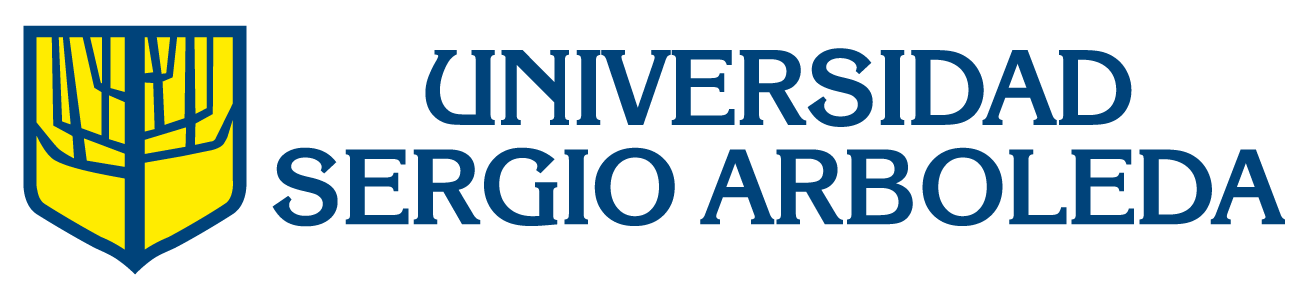


---




#**Taller 2 - Procesamiento de Histogramas**

**Autores:**  

* Carlos Bermúdez
* Miguel Thomas


**Programa acádemico:**  

* Ciencias de la computación e Inteligencia Artificial

**Materia:**   
* Procesamiento de Imagenes

Notas.

monotonica creciente / dominio y rango entre los mismos valores / no quire umbralizacion  debe ser funcion funcional (puede ser a trozos)  diferente de un promedio

#__Requerimientos__
Escribir un programa corto que le permita:

* Seleccionar una (o varias) de las imágenes.

* Abrir la imagen y dejarla en escala de grises en un solo canal
* Realizar una expansión de contraste
* Hacer una ecualización del histograma
* Escribir un texto acerca de las similitudes y diferencias en el procesamiento
  de imagen por expansión de contraste y ecualización
* Proponer una función de transformación y cual seria el objetivo de la misma (Una por cada integrante del equipo)
* Aplicarla sobre la imagen y pintar el histograma, describir que fue lo que paso
* Entregar un archivo .zip o .7z con el notebook de python o con un script y un documento adjunto con la explicación. mas la imagen utilizada

* los filtros no pueden ser umbralizacion, negativo estandar, promedio



C1-dmartinez-taller2.zip

In [241]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [242]:
#!wget "https://petapixel.com/assets/uploads/2019/04/p2219651326-5.jpg" -O tree.jpg

In [243]:
# Descargar imagen
#!wget "https://static5.depositphotos.com/1030296/395/i/450/depositphotos_3958211-stock-photo-new-york-cityscape-tourism-concept.jpg" -O newyork.jpg

## Escala de grises: Un canal


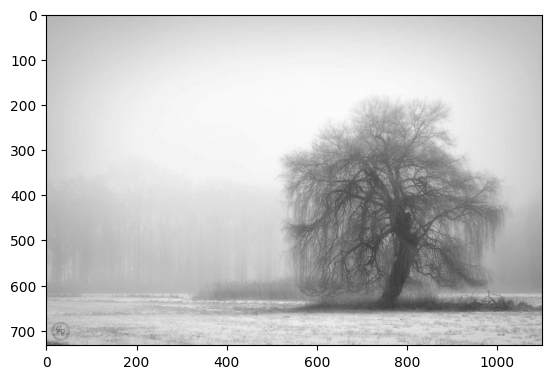

In [244]:
img_tree = plt.imread("tree.jpg")
img_tree_gray  = cv2.cvtColor(img_tree, cv2.COLOR_BGR2GRAY)

plt.imshow(img_tree_gray,cmap="gray")

## Realizar una expasion de contraste

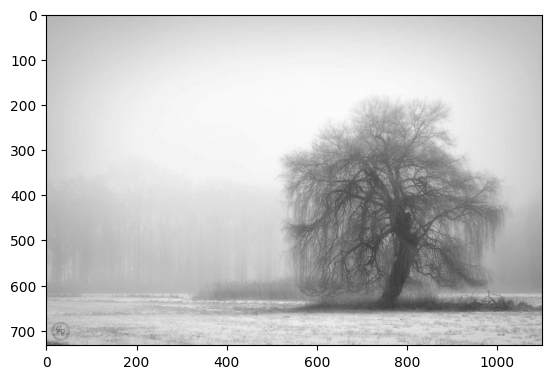

In [245]:
I_min = np.min(img_tree_gray)
I_max = np.max(img_tree_gray)
a = 255.0 / (I_max - I_min)
b = -a * I_min
imagen_contrastada = (a * img_tree_gray + b).clip(0, 255).astype(np.uint8)

plt.imshow(img_tree_gray, cmap = 'gray')

## Ecualizacion del histograma

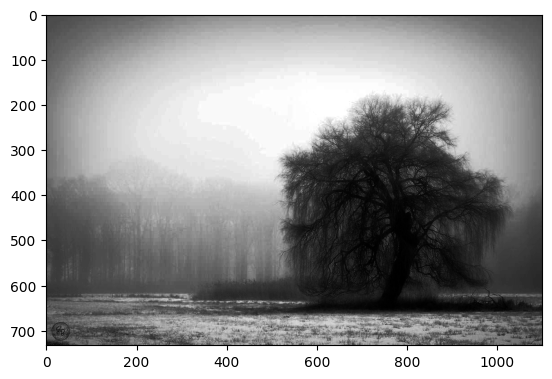

In [246]:
ecualizada = cv2.equalizeHist(img_tree_gray.astype(np.uint8))
plt.imshow(ecualizada, cmap="gray")


## Proponer una funcion de transformacion

### Transformacion: Gamma
* Objetivo: Modificar la luminancia de la imagen para mejorar la visualización y calidad de la imagen

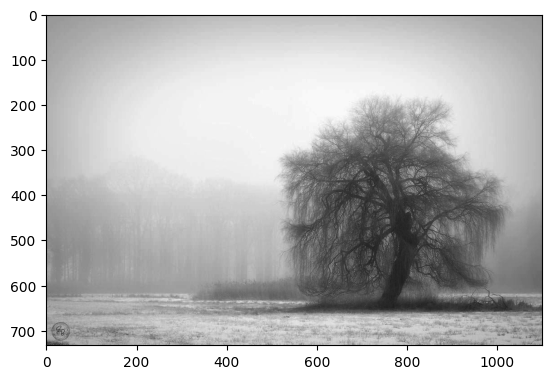

In [247]:
def transformacion_gamma(imagen, gamma=1.0):
    invGamma = 1.0 / gamma
    tabla = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(imagen, tabla)

imagen_gamma = transformacion_gamma(img_tree_gray, gamma=0.5)

plt.imshow(imagen_gamma, cmap="gray")

### Transformacion: Logistica
* Objetivo: Resaltar características específicas de la imagen ajustando el contraste de manera no lineal, especialmente útil en imágenes con variaciones sutiles de intensidad. En este caso por ejemplo se puede apreciar de donde proviene mayor luz

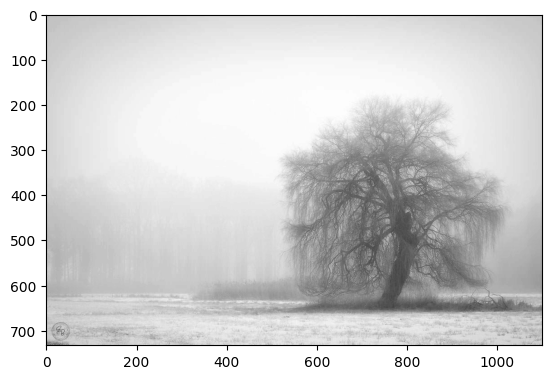

In [248]:
def transformacion_logistica(image, c=1):
    img_normalized = image / 255.0
    img_transformed = c * np.log(1 + img_normalized)
    return (img_transformed * 255).astype("uint8")

imagen_log = transformacion_logistica(img_tree_gray,1)

plt.imshow(imagen_log, cmap="gray")

## HISTOGRAMAS

### Imagen Arbol

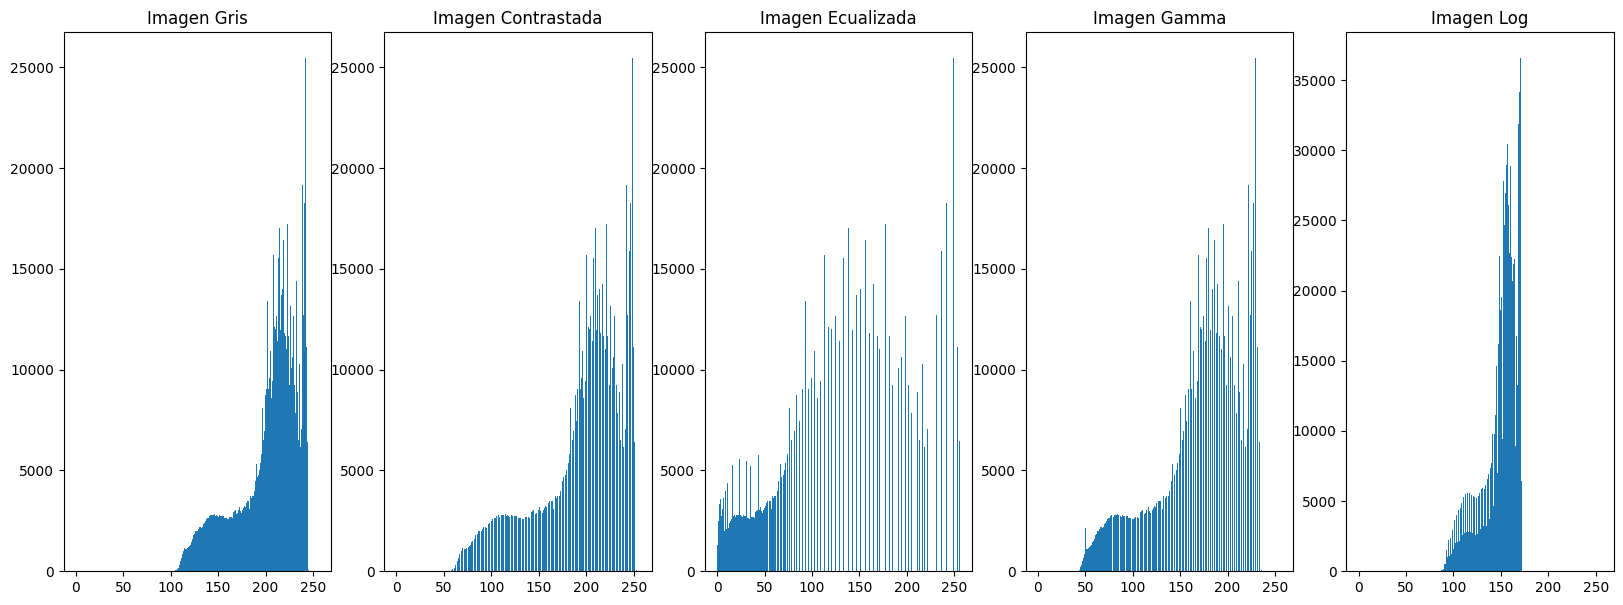

In [249]:
fig, axs = plt.subplots(1, 5, figsize=(20,7))

axs[0].hist(img_tree_gray.ravel(), bins=256, range=[0, 256])
axs[0].set_title('Imagen Gris')

axs[1].hist(imagen_contrastada.ravel(), bins=256, range=[0, 256])
axs[1].set_title('Imagen Contrastada')

axs[2].hist(ecualizada.ravel(), bins=256, range=[0, 256])
axs[2].set_title('Imagen Ecualizada')

axs[3].hist(imagen_gamma.ravel(), bins=256, range=[0, 256])
axs[3].set_title('Imagen Gamma')

axs[4].hist(imagen_log.ravel(), bins=256, range=[0, 256])
axs[4].set_title('Imagen Log')

plt.show()